In [80]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'books-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4200521%2F7250132%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T125317Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D38cb4018f75b979eb7106cc5f31eff71dcf6068cb0372eb20242a03129c25d1d398907d65e7c2da842bbc9caa735af90dc53b711e066620a7fb11aa9af167127cb7d09306703c428d82daca5e91d354eb091e84e69e18273617151fdf4e22cf75c72ba3c6ce410be283b6f6c90a525a3aabc2e6fc854f438daf1b1ab395319a73ca597009bb8966f42a4c33d82ad7eb8911fd33dc7c5047103e557c4a022e895dee51155d7d07049d73b8e965ba3b0bbd2ec63bf6244cb28edef9537289175f25a3aafb95935ce106a60f26b0053b6fbb247e43188b7ee73d1b34a336e99a41e6000e56032c9e1b2b39da6a3ec2f47b2bba476a0d7485fdd80ad895ed7e9f90a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 55469565 bytes downloaded
Downloaded and uncompressed: books-dataset
Data source import complete.


In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-dataset/BooksDataset.csv
/kaggle/input/books-dataset/BooksDatasetClean.csv


In [82]:
df = pd.read_csv("/kaggle/input/books-dataset/BooksDataset.csv")   # Load the dataset and get info
df.describe()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
count,103082,103082,70213,76912,103074,103082,103082
unique,97818,63580,68831,3106,13029,956,1387
top,The Nutcracker,By,For Ingest Only - Data needs to be cleaned up ...,"Fiction , General",Simon & Schuster,"Thursday, January 1, 2004",Price Starting at $5.29
freq,12,1043,30,2549,1521,868,41876


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103082 entries, 0 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         103082 non-null  object
 1   Authors       103082 non-null  object
 2   Description   70213 non-null   object
 3   Category      76912 non-null   object
 4   Publisher     103074 non-null  object
 5   Publish Date  103082 non-null  object
 6   Price         103082 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [53]:
df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


In [83]:
df.isnull().sum()            # Check if there is null objects on dataset

,0
Title,0
Authors,0
Description,32869
Category,26170
Publisher,8
Publish Date,0
Price,0


In [84]:
# Fill missing 'Description', 'Category', and 'Publisher' with 'Unknown'
df['Description'].fillna('Unknown', inplace=True)
df['Category'].fillna('Unknown', inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)

In [85]:
df.isnull().sum()

,0
Title,0
Authors,0
Description,0
Category,0
Publisher,0
Publish Date,0
Price,0


# Check most using words in that dataset

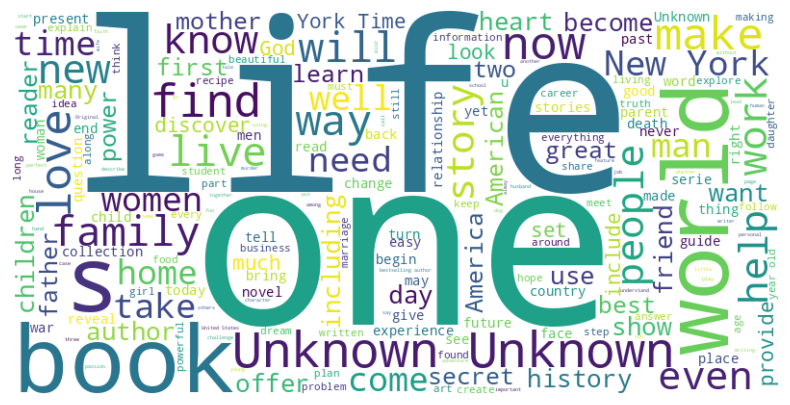

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = ' '.join(df['Description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Supervised Learning

* For training I need to convert categorical data into numerical form
* I use Label Encoding




In [74]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ['Authors', 'Category', 'Publisher']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

* Extracting numeric part of output

In [75]:
# Extract numeric part of Price (assuming 'Price Starting at $5.29' format)
df['Price'] = df['Price'].str.extract(r'(\d+\.\d+)').astype(float)

* Split the data into training and testing sets to evaluate the model's performance

In [60]:
"""from sklearn.model_selection import train_test_split

# Features and target
X = df[['Authors', 'Category', 'Publisher']]  # We use to make predictions based on these
y = df['Price']                               # We want to predict prices

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"""

"from sklearn.model_selection import train_test_split\n\n# Features and target\nX = df[['Authors', 'Category', 'Publisher']]  # We use to make predictions based on these\ny = df['Price']                               # We want to predict prices\n\n# Split the dataset into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"

* Random Forest Regressor Algorithm

In [61]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# the average squared difference between the predicted and actual book prices is about MSE = 73.83 units
# the lower the MSE, the better the model is at predicting"""

"from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error\n\n# Initialize and train the model\nmodel = RandomForestRegressor(random_state=42)\nmodel.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nprint(f'Mean Squared Error: {mse}')\n# the average squared difference between the predicted and actual book prices is about MSE = 73.83 units\n# the lower the MSE, the better the model is at predicting"

In [62]:
df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,11518,Unknown,1038,3421,"Friday, January 1, 1993",8.79
1,The Missing Person,23169,Unknown,758,9279,"Sunday, March 1, 1981",4.99
2,Don't Eat Your Heart Out Cookbook,45671,Unknown,485,12722,"Thursday, September 1, 1983",4.99
3,When Your Corporate Umbrella Begins to Leak: A...,13798,Unknown,3106,7861,"Monday, April 1, 1991",4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,54159,Unknown,3106,714,"Saturday, February 1, 1997",5.32


* XGBoost Algorithm

In [63]:
#!pip install xgboost

In [64]:
"""import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost regressor model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgboost_model.predict(X_test)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error with XGBoost: {mse_xgb}')"""

"import xgboost as xgb\nfrom sklearn.metrics import mean_squared_error\n\n# Initialize the XGBoost regressor model\nxgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)\n\n# Train the model on the training data\nxgboost_model.fit(X_train, y_train)\n\n# Make predictions on the test data\ny_pred_xgb = xgboost_model.predict(X_test)\n\n# Calculate Mean Squared Error\nmse_xgb = mean_squared_error(y_test, y_pred_xgb)\nprint(f'Mean Squared Error with XGBoost: {mse_xgb}')"

## Deductions
* Both, Random Forest and XGBoost algorithms' result is similar
* Both models are performing similarly, and the performance may not be ideal yet
* MSE = 73.83 this means that, on average, the square of the difference between the predicted price and the actual price is 73.83
* Example: If the actual price of a book is 10dollars , the model might predict 2dollars or $18, and the squared difference would be quite large.
* In this case, an MSE of 73.83 suggests the model’s predictions aren’t too close to the actual prices yet. The goal is to lower this error by improving the model.

# Improving The Model

## 1. Add new features

In [87]:
# Convert Publish Date to year
df['Publish Year'] = pd.to_datetime(df['Publish Date'], errors='coerce').dt.year

# Add description length as a feature
df['Description Length'] = df['Description'].apply(lambda x: len(str(x)))

In [88]:
"""from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ['Authors', 'Category', 'Publisher', 'Publish Year', 'Description Length']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

from sklearn.model_selection import train_test_split

# Features and target
X = df[['Authors', 'Category', 'Publisher', 'Publish Year', 'Description Length']]  # I use to make predictions based on these
y = df['Price']                               # I want to predict prices

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# the average squared difference between the predicted and actual book prices is about MSE = 73.83 units
# the lower the MSE, the better the model is at predicting"""

KeyboardInterrupt: 

## Deductions
* With the new features like "Publish Year" and "Description Length", the model's Mean Squared Error(MSE) has improved from 73.83 to 69.53.
* This shows that the additional features helped the model better predict book prices.
* In conclusion, reducing the MSE means the model's predictions are getting closer to the actual

## 2. Hyperparameter Tuning

## What is Random Forest?
Imagine you have a forest full of trees. In this case, each tree is like a decision-maker that makes a prediction based on the data. A Random Forest is a collection of many decision trees, and each tree gives its prediction. The forest then combines the predictions from all these trees to make a final prediction.
### How it works:


1.  Each tree in the forest makes a decision about the price of the books.
2.  The Random Forest model asks many trees for their opinion (predictions).
3.  It combines all these predictions (usually by averaging) to make the final prediction.



### Key Terms:
* Trees (n_estimators): The number of trees (decision-makers) in the forest. More trees usually give better results but take longer to train.
* Depth (max_depth): How deep the trees can go. If the tree is too deep, it might learn too much detail (overfitting), and if too shallow, it might miss important patterns (underfitting).
* Splits (min_samples_split): The minimum number of data points needed to decide whether the tree should split into more branches.



### In this model:
* Each tree is helping to predict book prices based on features like Author, Category, Publisher, Publish Year, etc.
* The forest is the collection of trees that combine their predictions to give a better estimate

In [67]:
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid to search
# param_dist dictionary contains the ranges of values for different hyperparameters
param_dist = {
    'n_estimators': [100, 200, 500, 1000],   # number of trees in the forest
    'max_depth': [10, 20, 30, None],         # maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # minumum number of samples required to be at a leaf node
    'max_features': ['sqrt']                 # the number of features to consider when looking for the best split
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV
# It performs a search over the parameter space defined in param_dist
# n_iter=10 means it will test 100 different combinations, and cv=3 indicates 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Make predictions using the best model
# best_rf is the best model found by the search
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error after hyperparameter tuning: {mse}')
print(f'Best parameters: {random_search.best_params_}')"""

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mean Squared Error after hyperparameter tuning: 65.08717707439462
Best parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}


### Why Tune Hyperparameters?
* n_estimators: If you add more trees, the model usually improves, but it takes more time to train.
* max_depth: Controls how deep each tree can grow. If trees are too deep, they overfit (learn too much from the training data) and might not generalize well to new data.
* min_samples_split: Prevents the tree from splitting into branches for very small datasets.

### In this model:
* Features like 'Authors', 'Category', 'Publisher', 'Publish Year' are used by each tree to make predictions about the book Price.
* The Random Forest model creates many decision trees (like multiple experts), and the average prediction from all these trees gives the final price prediction

## 3. Cross-Validation

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Initialize RandomForestRegressor with best parameters from RandomizedSearchCV
best_rf = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

# Define the scoring method (using negative mean squared error because cross_val_score maximizes by default)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring=mse_scorer, n_jobs=-1)

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print the MSE for each fold and the mean MSE
print(f'Cross-Validation MSE scores for each fold: {cv_scores}')
print(f'Mean Cross-Validation MSE: {np.mean(cv_scores)}')


KeyboardInterrupt: 

## 4. Add more features

In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example dataset (assuming you've loaded it as `df`)

# 1. Extract new features
# Price already exists as the target feature
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.extract(r'(\d+\.\d+)').astype(float)

# 1.1 Book Age (difference between publish year and current year)
df['Book Age'] = 2024 - df['Publish Year']

# 1.2 Description Length (assuming description is text data)
df['Description Length'] = df['Description'].str.len()

# 1.3 If the book is part of a series (binary feature)
df['Is_Series'] = df['Title'].str.contains('Book \d+', regex=True).astype(int)

# Convert 'Publish Date' to datetime, coercing invalid formats to NaT
df['Publish Date'] = pd.to_datetime(df['Publish Date'], errors='coerce')

# 1.4 Extract Publish Month (if you have publish date in your data)
df['Publish Month'] = df['Publish Date'].dt.month

# Now, invalid date entries (NaT) will result in NaN for the 'Publish Month' feature
# If needed, you can fill NaN values with a default (e.g., 0 or the most frequent month)
df['Publish Month'].fillna(0, inplace=True)  # Filling NaN with 0 as an example

# 2. Categorical Encoding for 'Authors', 'Category', 'Publisher' (LabelEncoder can handle this)
label_encoders = {}
for column in ['Authors', 'Category', 'Publisher']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# 3. New Features like 'Publisher Popularity' or 'Author Popularity' (based on their counts in the dataset)
df['Author Popularity'] = df['Authors'].map(df['Authors'].value_counts())
df['Publisher Popularity'] = df['Publisher'].map(df['Publisher'].value_counts())

# 4. Select the features for the model
# Columns you created, encoded, or mapped
X = df[['Authors', 'Category', 'Publisher', 'Book Age', 'Description Length',
        'Is_Series', 'Publish Month', 'Author Popularity', 'Publisher Popularity']]
y = df['Price']  # Target is the price

# 5. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = model.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 65.61198740551751
